In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/cybertrend-datathon/main/clean_data/pariwisata/jumlah-wisatawan-mancanegara-ke-dkijakarta-2012-2020.csv?token=ASDCMJU6XHVEXOJXSA3TVG3BMMXY6')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df

,Bulan,jumlah_wisatawan,tahun,tanggal
0,1,156654,2012,2012-01-01
1,2,154698,2012,2012-02-01
2,3,165927,2012,2012-03-01
3,4,161005,2012,2012-04-01
4,5,185932,2012,2012-05-01
...,...,...,...,...
103,8,4469,2020,2020-08-01
104,9,7468,2020,2020-09-01
105,10,10492,2020,2020-10-01
106,11,14309,2020,2020-11-01


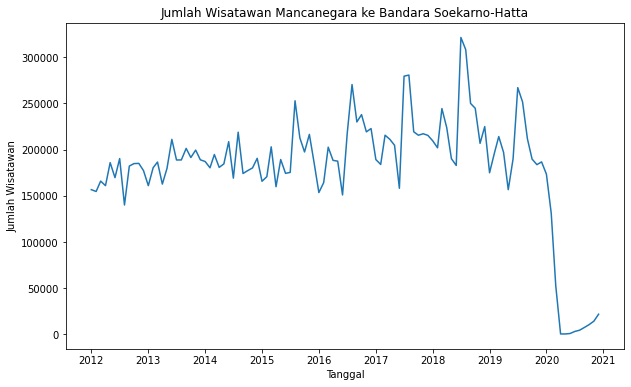

In [87]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'tanggal', y = 'jumlah_wisatawan')
plt.title('Jumlah Wisatawan Mancanegara ke Bandara Soekarno-Hatta')
plt.ylabel('Jumlah Wisatawan')
plt.xlabel('Tanggal')
plt.show()

In [88]:
df2 = df.groupby(['Bulan']).agg({'jumlah_wisatawan':'mean'})

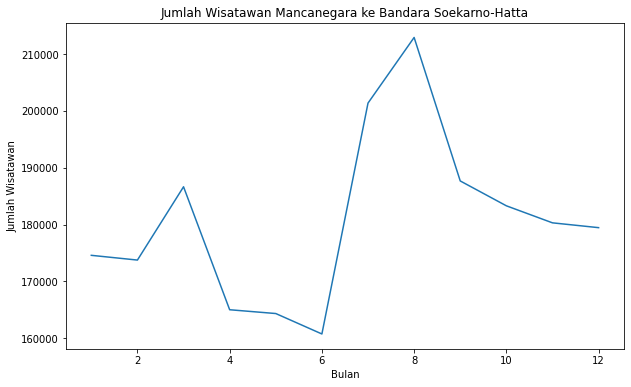

In [89]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df2, x = 'Bulan', y = 'jumlah_wisatawan')
plt.title('Jumlah Wisatawan Mancanegara ke Bandara Soekarno-Hatta')
plt.ylabel('Jumlah Wisatawan')
plt.show()

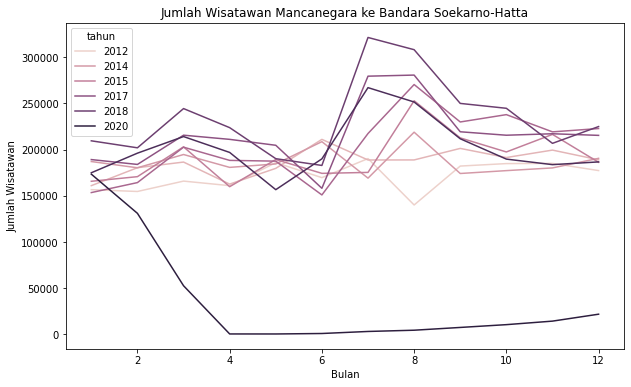

In [90]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Bulan', y = 'jumlah_wisatawan', hue = 'tahun')
plt.title('Jumlah Wisatawan Mancanegara ke Bandara Soekarno-Hatta')
plt.ylabel('Jumlah Wisatawan')
plt.show()

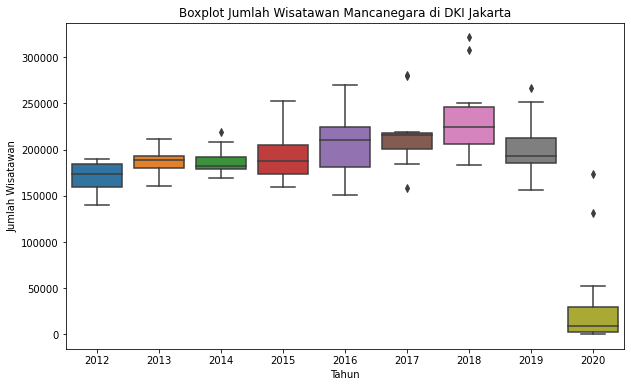

In [91]:
## Boxplot

plt.figure(figsize= (10, 6))
sns.boxplot(data = df, x = 'tahun', y='jumlah_wisatawan')
plt.ylabel('Jumlah Wisatawan')
plt.xlabel('Tahun')
plt.title('Boxplot Jumlah Wisatawan Mancanegara di DKI Jakarta')
plt.show()

# Data Splitting

10% Testing 90% Training (10% Validation 90% Training)

In [92]:
y = df['jumlah_wisatawan']
X = df['tanggal']

In [93]:
X

0     2012-01-01
1     2012-02-01
2     2012-03-01
3     2012-04-01
4     2012-05-01
         ...    
103   2020-08-01
104   2020-09-01
105   2020-10-01
106   2020-11-01
107   2020-12-01
Name: tanggal, Length: 108, dtype: datetime64[ns]

In [94]:
train_df = df[(df['tahun'] >= 2012) & (df['tahun'] <= 2018)]
valid_df = df[df['tahun'] == 2019]
test_df = df[df['tahun'] == 2020]

print(train_df.shape) ## Each year containing 12 months
print(valid_df.shape)
print(test_df.shape)

(84, 4)
(12, 4)
(12, 4)


In [95]:
y_train, X_train,  = train_df['jumlah_wisatawan'], pd.to_datetime(train_df['tanggal'])
y_valid, X_valid,  = valid_df['jumlah_wisatawan'], pd.to_datetime(valid_df['tanggal'])
y_test, X_test,  = test_df['jumlah_wisatawan'], pd.to_datetime(test_df['tanggal'])

print(X_train.shape, y_train.shape)
print(X_train.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(84,) (84,)
(84,) (12,)
(12,) (12,)


In [96]:
train_data = {'ds': X_train, 'y': y_train}
train_data = pd.DataFrame(train_data)
train_data['ds'] = pd.to_datetime(train_data['ds'],)
print(train_data.shape)

valid_data = {'ds': X_valid, 'y': y_valid}
valid_data = pd.DataFrame(valid_data)
valid_data['ds'] = pd.to_datetime(valid_data['ds'])
print(valid_data.shape)

test_data = {'ds': X_test, 'y': y_test}
test_data = pd.DataFrame(test_data)
test_data['ds'] = pd.to_datetime(test_data['ds'])
print(test_data.shape)

(84, 2)
(12, 2)
(12, 2)


In [134]:
valid_data

,ds,y
84,2019-01-01,174963
85,2019-02-01,196183
86,2019-03-01,214161
87,2019-04-01,196977
88,2019-05-01,156654
89,2019-06-01,190031
90,2019-07-01,267143
91,2019-08-01,251596
92,2019-09-01,211775
93,2019-10-01,189759


In [97]:
train_data

,ds,y
0,2012-01-01,156654
1,2012-02-01,154698
2,2012-03-01,165927
3,2012-04-01,161005
4,2012-05-01,185932
...,...,...
79,2018-08-01,308231
80,2018-09-01,250058
81,2018-10-01,244775
82,2018-11-01,206820


# Modelling

In [320]:
from fbprophet import Prophet

model = Prophet(changepoint_prior_scale=30,
                 seasonality_mode='multiplicative',
                seasonality_prior_scale = 35,
                holidays_prior_scale = 25,
                growth = "flat"
                )

model.add_country_holidays(country_name='ID')
model.fit(train_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



In [321]:
model.train_holiday_names

0               New Year's Day
1             Chinese New Year
2        Day of Silence/ Nyepi
3           Ascension of Jesus
4     Ascension of the Prophet
5                    Labor Day
6            Buddha's Birthday
7                  Eid al-Fitr
8             Independence Day
9       Feast of the Sacrifice
10            Islamic New Year
11        Birth of the Prophet
12                   Christmas
13               Pancasila Day
dtype: object

In [322]:
# future = pd.DataFrame({'ds' : '2019'})
future = model.make_future_dataframe(periods = 0, freq = "m")

added_date = ['2019-'+str(i+1)+'-01' for i in range(12)]
added_date = pd.DataFrame({'ds': added_date})
added_date['ds'] = pd.to_datetime(added_date['ds'])

future_df = pd.concat([future, added_date])
future_df

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
7,2019-08-01
8,2019-09-01
9,2019-10-01
10,2019-11-01


In [323]:
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



,ds,yhat,yhat_lower,yhat_upper
91,2019-08-01,262356.609563,228866.289763,295062.090008
92,2019-09-01,207177.770510,174889.995415,241470.720069
93,2019-10-01,198957.219071,165393.998638,233903.940969
94,2019-11-01,205141.103629,169682.707208,240010.059702
95,2019-12-01,198247.324756,164895.516353,233251.799537


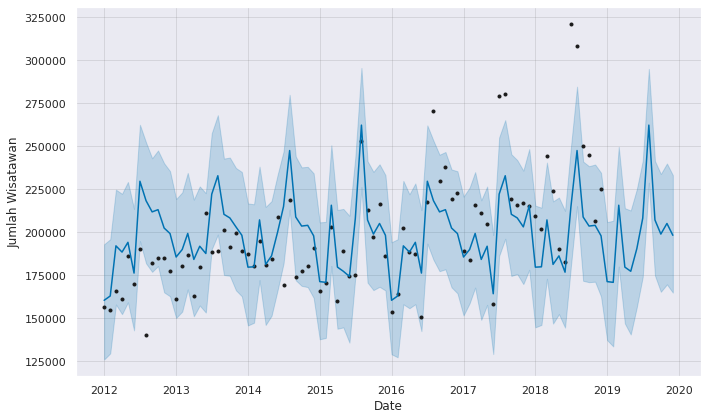

In [324]:
confirmed_forecast_plot = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Jumlah Wisatawan')
plt.show()

In [325]:
forecast_done = forecast[forecast['ds'] >= '2019-01-01']

In [326]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Wisatawan Mancanegara ke Soekarno Hatta', x=train_data['ds'], y=train_data['y']),
    go.Bar(name='Wisatawan Mancanegara ke Soekarno Hatta 2019 Forecasted', x=forecast_done['ds'], y=forecast_done['yhat'])
])

fig.update_layout(barmode='group', title='Wisatawan Mancanegara Real + Forecast')
fig.show()

In [327]:
fig = go.Figure(data=[
    go.Bar(name='Wisatawan Mancanegara ke Soekarno Hatta', x=train_data['ds'], y=train_data['y']),
    go.Bar(name='Wisatawan Mancanegara ke Soekarno Hatta', x=valid_data['ds'], y=valid_data['y'])
])

fig.update_layout(barmode='group', title='Wisatawan Mancanegara ke Soekarno Hatta')
fig.show()

In [328]:
preds = {'ds': forecast_done["ds"], 'y': forecast_done["yhat"]}
preds = pd.DataFrame(preds)
preds

,ds,y
84,2019-01-01,171305.709245
85,2019-02-01,170876.592153
86,2019-03-01,215750.231148
87,2019-04-01,179741.875523
88,2019-05-01,177311.579808
89,2019-06-01,190520.803407
90,2019-07-01,208208.423861
91,2019-08-01,262356.609563
92,2019-09-01,207177.770510
93,2019-10-01,198957.219071


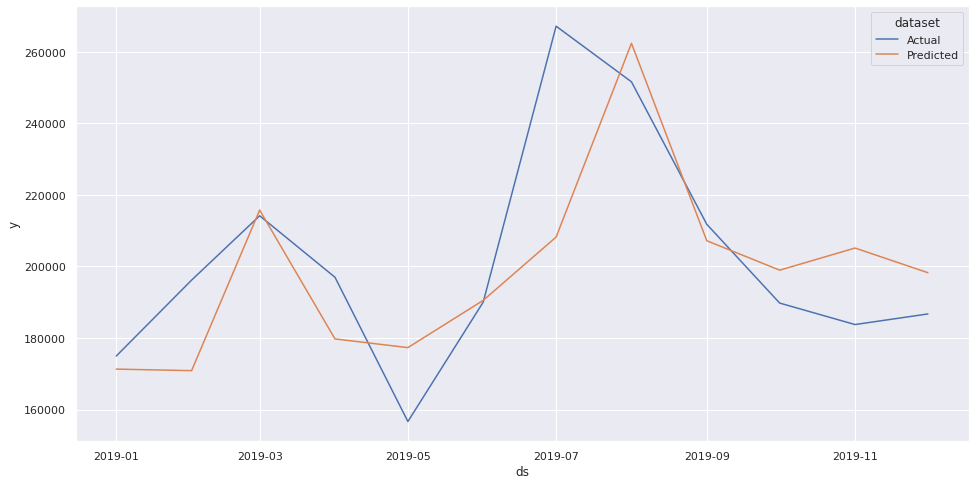

In [329]:
concatenated = pd.concat([valid_data.assign(dataset='Actual'), preds.assign(dataset='Predicted')])
sns.set(rc={'figure.figsize':(16, 8)})
sns.lineplot(x='ds', y='y', data=concatenated.reset_index(), hue='dataset')
plt.show()

In [331]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Max Error: " + str(max_error(valid_data["y"], preds['y'])))
print("Mean Absolute Error: " + str(mean_absolute_error(valid_data["y"], preds['y'])))
print("R2 Score: " + str(r2_score(valid_data["y"],preds['y'])))
print("Root Mean Square Error: " + str(mean_squared_error(valid_data["y"], preds['y'], squared=False)))

Max Error: 58934.576139020355
Mean Absolute Error: 15444.375007503493
R2 Score: 0.4681017434717134
Root Mean Square Error: 21727.7892123204
